In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd


In [ ]:
req = requests.get ("https://play.google.com/store/apps/details?id=com.avira.passwordmanager&hl=en-IN")

In [ ]:
soup = BeautifulSoup(req.content,"html.parser")


In [ ]:
comments = soup.find_all('div', {'class': 'UD'})
comment_texts = []
for comment in comments:
    comment_text = comment.find('span', {'jsname': ''}).text.strip()
    comment_texts.append(comment_text)

In [ ]:
import csv

In [ ]:
with open('comments.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['comment'])
    for comment_text in comment_texts:
        writer.writerow([comment_text])

In [ ]:
comments_df = pd.read_csv('comments.csv')


In [ ]:
sentiment_scores = []
for comment in comments_df['comment']:
    blob = TextBlob(comment)
    sentiment_scores.append(blob.sentiment.polarity)

In [ ]:
 sentiments = []
for score in sentiment_scores:
    if score > 0:
        sentiments.append('1')
    elif score < 0:
        sentiments.append('-1')
    else:
        sentiments.append('0')


IndexError: ignored

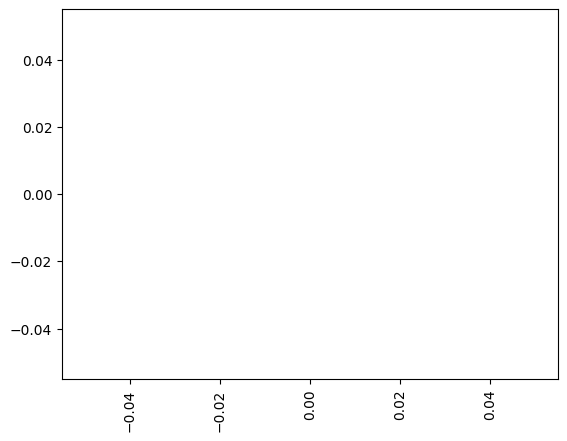

In [ ]:
sentiments_df = pd.DataFrame(sentiments, columns=['Sentiment'])
sentiments_counts = sentiments_df['Sentiment'].value_counts()
sentiments_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
comments_df['Sentiment'] = sentiments
comments_df.to_csv('result.csv', index=False)
